# **Program Menghitung Statistik  Kebakaran dan Data Fitting dengan Regresi Eksponensial**

Banyak pohon awal |  Banyak pohon setelah iterasi | Persentase terbakar
______________________________________________________________________
227               |  227                          |  0.0
232               |  232                          |  0.0
221               |  221                          |  0.0
225               |  225                          |  0.0
234               |  234                          |  0.0
239               |  239                          |  0.0
228               |  228                          |  0.0
235               |  235                          |  0.0
231               |  231                          |  0.0
231               |  231                          |  0.0
Rata-rata hutan yang terbakar 0.0 %
Burn Probability:  0.1
Banyak pohon awal |  Banyak pohon setelah iterasi | Persentase terbakar
______________________________________________________________________
234               |  233                          |  0.4273504273504274
230          

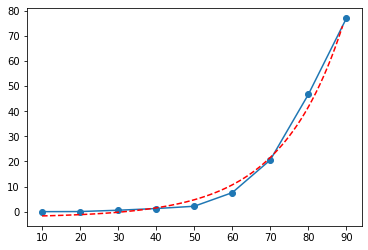

In [ ]:
#IMPORT LIBRARY
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

#INISIASI KONDISI 
EMPTY = 0                     #Sel kosong
TREE = 1                      #Sel dengan pohon yang tidak terbakar
BURNING = 2                   #Sel dengan pohon yang terbakar
rata=0

#INISIASI DATA FITTING
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
y = []

#INISIASI KONSTANTA
n=17          
probTree=0.8
t=17

for i in range (9):
  print("Banyak pohon awal |"," Banyak pohon setelah iterasi |","Persentase terbakar")
  print("______________________________________________________________________")
  probBurning = (i)*0.1
  for k in range (10):
    #FUNGSI UNTUK MATRIKS KONDISI AWAL HUTAN BERUKURAN nxn DENGAN POHON DI TENGAH HUTAN TERBAKAR
    def initForest(n,probTree):
      forest = [[0 for j in range(n)]for i in range(n)]
      for i in range(n):
        for j in range(n):
          if i==8 and j==8:             #inisiasi awal terdapat pohon terbakal di tengah-tengah hutan
            forest[i][j]=BURNING
          else:
            rand=random.random()
            if rand < probTree:         #terdapat pohon
              forest[i][j] = TREE       
            else:                       #tidak terdapat pohon
              forest[i][j] = EMPTY
      return forest

    #KONDISI BATAS PERIODIC
    #Menambah atau memperluas grid
    def periodicLat(lat):
      latNS = [[0 for j in range(n+2)] for i in range(n+2)]
      for i in range (1,n+1):
        for j in range (1,n+1):
          latNS[i][j]=lat[i-1][j-1]
      for j in range (n):
        latNS[0][j+1]=lat[n-1][j]
        latNS[n+1][j+1]=lat[0][j]
      for i in range (n+2):
        latNS[i][0]=latNS[i][n]
        latNS[i][n+1]=latNS[i][1]
      return latNS

    #FUNGSI UNTUK MENERAPKAN SPREAD PADA MATRIKS YANG TELAH DIEXPEND
    def applyExtended(latExt,probBurning):
        newLat =[[0 for j in range(n)]for i in range(n)]
        for i in range(1,n+1):
          for j in range(1,n+1):
            site = latExt[i][j]
            N = latExt[i-1][j]
            S = latExt[i+1][j]
            E = latExt[i][j+1]
            W = latExt[i][j-1]
            newLat[i-1][j-1] = spread(site,N,S,E,W,probBurning)
        return newLat

    #FUNGSI UNTUK MENGEMBALIKAN NILAI DARI SITE PADA WAKTU SELANJUTNYA
    def spread(site, N, S, E, W, probBurning):
      if (site == EMPTY) or (site==BURNING):
        newSite = EMPTY
      else:
        if N == BURNING or E == BURNING or S == BURNING or W == BURNING:
          rand = random.random()
          if rand < probBurning:
            newSite = BURNING
          else:
            newSite = TREE
        else:
          newSite=TREE
      return newSite

    #SIMULASI
    def fire(n,probTree,probBurning,t):
      forest = initForest(n,probTree)
      # Jalankan Simulasi
      grids = np.zeros((t+1,n,n))     
      grids[0, :, :] = forest                                               
      for i in range(1,t+1):
          forestExtended = periodicLat(forest)
          forest = applyExtended(forestExtended, probBurning)
          grids[i,:, :] = forest     
      return (grids)

    grids = fire(n,probTree,probBurning,t)
    tree=0
    for i in range(n):
      for j in range (n):
        if grids[0,i,j]==TREE :
          tree+=1
    tree2=0
    for i in range (n):
      for j in range(n):
        if grids[t,i,j]==TREE :
          tree2+=1
    terbakar=tree-tree2
    persentase=terbakar/tree *100
    rata+=persentase
    print(tree,"              | ",tree2,"                         | ",persentase)

  rata=rata/10
  print("Rata-rata hutan yang terbakar",rata,"%")
  y.append(rata)
  print("Burn Probability: ",probBurning+0.1)
  print("======================================================================")


#PROGRAM DATA FITTING

#Import Library
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
#Define the true objective function
def objective(x, a, b, c):
	return a * np.exp(b * (x/10)) + c

#Curve fit
popt, _ = curve_fit(objective, x, y)
#Summarize the parameter values
a, b, c = popt
print('y = %.5f * e ^(%.5f * (x/10)) + %.5f' % (a, b, c))
#Plot input vs output
pyplot.scatter(x, y)
#Line plot
plt.plot(x, y)
#Define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
#Calculate the output for the range
y_line = objective(x_line, a, b, c)
#Create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

### **PROGRAM PENYEBARAN API DENGAN DISPLAY ANIMASI**

Masukkan burnProbability: 0.8


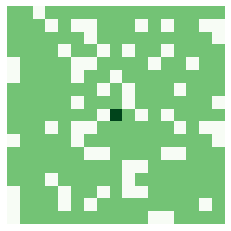

In [ ]:
#PENYEBARAN API

#IMPORT LIBRARY
import random
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#INISIASASI KONDISI 
EMPTY = 0                     #Sel kosong
TREE = 1                      #Sel dengan pohon yang tidak terbakar
BURNING = 2                   #Sel dengan pohon yang terbakar

#FUNGSI UNTUK MATRIKS KONDISI AWAL HUTAN BERUKURAN nxn DENGAN POHON DI TENGAH HUTAN TERBAKAR
def initForest(n,probTree,probBurning):
  forest = [[0 for j in range(n)]for i in range(n)]
  for i in range(n):
    for j in range(n):
      if i==8 and j==8:             #inisiasi awal terdapat pohon terbakal di tengah-tengah hutan
        forest[i][j]=BURNING
      else:
        rand=random.random()
        if rand < probTree:         #terdapat pohon
          forest[i][j] = TREE       
        else:                       #tidak terdapat pohon
          forest[i][j] = EMPTY
  return forest

#KONDISI BATAS PERIODIC
#Menambah atau memperluas grid
def periodicLat(lat):
  latNS = [[0 for j in range(n+2)] for i in range(n+2)]
  for i in range (1,n+1):
    for j in range (1,n+1):
      latNS[i][j]=lat[i-1][j-1]
  for j in range (n):
    latNS[0][j+1]=lat[n-1][j]
    latNS[n+1][j+1]=lat[0][j]
  for i in range (n+2):
    latNS[i][0]=latNS[i][n]
    latNS[i][n+1]=latNS[i][1]
  return latNS

#FUNGSI UNTUK MENERAPKAN SPREAD PADA MATRIKS YANG TELAH DIEXPEND
def applyExtended(latExt,probBurning):
    newLat =[[0 for j in range(n)]for i in range(n)]
    for i in range(1,n+1):
      for j in range(1,n+1):
        site = latExt[i][j]
        N = latExt[i-1][j]
        S = latExt[i+1][j]
        E = latExt[i][j+1]
        W = latExt[i][j-1]
        newLat[i-1][j-1] = spread(site,N,S,E,W,probBurning)
    return newLat

#FUNGSI UNTUK MENGEMBALIKAN NILAI DARI SITE PADA WAKTU SELANJUTNYA
def spread(site, N, S, E, W, probBurning):
  if (site == EMPTY) or (site==BURNING):
    newSite = EMPTY
  else:
    if N == BURNING or E == BURNING or S == BURNING or W == BURNING:
      rand = random.random()
      if rand < probBurning:
        newSite = BURNING
      else:
        newSite = TREE
    else:
      newSite=TREE
  return newSite

#SIMULASI
def fire(n,probTree,probBurning,t):
    forest = initForest(n,probTree,probBurning)
    # Jalankan Simulasi
    grids = np.zeros((t+1,n,n))     
    grids[0, :, :] = forest                                                   #j dan k nya diisi dengan forest
    #grids = np.zeros((n,n))     
    #grids[ :, :] = forest    
    for i in range(1,t+1):
        forestExtended = periodicLat(forest)
        forest = applyExtended(forestExtended, probBurning)
        grids[i,:, :] = forest     
    return (grids)

n=17
probTree=0.8
probBurning =float(input("Masukkan burnProbability: "))
t=17

grids = fire(n,probTree,probBurning,t)

#DISPLAY
fig = plt.figure()
plt.axis('off')
im = plt.imshow(grids[0,:,:],cmap="Greens",animated=True)

def updatefig(i, *args):
    im.set_array(grids[i,:,:])
    return im,

anim = animation.FuncAnimation(fig, updatefig, save_count = len(grids), 
                                   interval=100, blit=False)
plt.show()

from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim
